<a href="https://colab.research.google.com/github/PradyumnaGupta/MNIST/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn 

In [0]:
data_train=pd.read_csv('sample_data/mnist_train_small.csv')
data_test=pd.read_csv('sample_data/mnist_test.csv')

In [23]:
print(data_train.shape)
print(data_test.shape)

(19999, 785)
(9999, 785)


In [24]:
print(data_train.head)

<bound method NDFrame.head of        6  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.581  0.582  0.583  \
0      5  0    0    0    0    0    0    0    0    0  ...      0      0      0   
1      7  0    0    0    0    0    0    0    0    0  ...      0      0      0   
2      9  0    0    0    0    0    0    0    0    0  ...      0      0      0   
3      5  0    0    0    0    0    0    0    0    0  ...      0      0      0   
4      2  0    0    0    0    0    0    0    0    0  ...      0      0      0   
5      0  0    0    0    0    0    0    0    0    0  ...      0      0      0   
6      6  0    0    0    0    0    0    0    0    0  ...      0      0      0   
7      5  0    0    0    0    0    0    0    0    0  ...      0      0      0   
8      5  0    0    0    0    0    0    0    0    0  ...      0      0      0   
9      2  0    0    0    0    0    0    0    0    0  ...      0      0      0   
10     7  0    0    0    0    0    0    0    0    0  ...      0      0      0  

In [50]:
shape=data_train.shape
X_train=pd.DataFrame(data_train.iloc[:,1:shape[1]])
Y_train=pd.DataFrame(data_train.iloc[:,0])
X_test=pd.DataFrame(data_test.iloc[:,1:shape[1]])
Y_test=pd.DataFrame(data_test.iloc[:,0])
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
#print(X_test.head)
#print(Y_test.head)
#print(Y_train.shape)

(19999, 784)
(19999, 1)
(9999, 784)
(9999, 1)


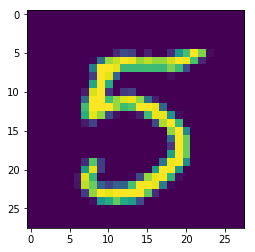

5


In [51]:
plt.figure()
image=np.reshape(np.array(X_train)[0,:],(28,28))
plt.imshow(image)
plt.show()
print(Y_train.iloc[0,0])

In [52]:
#
train_X=[]
for i in range(X_train.shape[0]):
  arr=np.reshape(np.array(X_train.iloc[i,:]),(28,28,1))
  train_X.append(arr)
X_train=np.array(train_X)
plt.figure()
#plt.imshow(X_train[0,:,:,:])
plt.show()
print(X_train.shape)
print(np.array(train_X).shape)
#
test_X=[]
for i in range(X_test.shape[0]):
  arr=np.reshape(np.array(X_test.iloc[i,:]),(28,28,1))
  test_X.append(arr)
X_test=np.array(test_X)
plt.figure()
#plt.imshow(X_test[0,:,:,:])
plt.show()
print(X_test.shape)

<Figure size 432x288 with 0 Axes>

(19999, 28, 28, 1)
(19999, 28, 28, 1)


<Figure size 432x288 with 0 Axes>

(9999, 28, 28, 1)


In [0]:
X_train=X_train/255
X_test=X_test/255
#plt.figure()
#plt.imshow(temp[0])
#plt.show()

In [54]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(19999, 28, 28, 1)
(19999, 1)
(9999, 28, 28, 1)
(9999, 1)


In [0]:
import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model,Sequential
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
#from resnets_utils import *
from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
%matplotlib inline

import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

In [61]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder(handle_unknown="ignore")
Y_train=enc.fit_transform(Y_train).toarray()
Y_test=enc.transform(Y_test).toarray()
#Y_train=convert_to_one_hot(Y_train.T,10).T
#Y_test=convert_to_one_hot(Y_test.T,10).T
print(Y_temp[0:5,:])
print(Y_test.shape)

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
(9999, 10)


In [62]:
print(Y_train.shape)
print(Y_test.shape)

(19999, 10)
(9999, 10)


In [0]:
classifier=Sequential()
#print(X_train.shape)
classifier.add(Conv2D(32,(5,5),padding='Same',activation='relu',kernel_initializer=glorot_uniform(seed=0),input_shape=[28,28,1]))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D((2,2),strides=(1,1)))
#print(X_train.shape)
classifier.add(Conv2D(32,(3,3),padding='Same',activation='relu',kernel_initializer=glorot_uniform(seed=0)))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D((2,2),strides=(1,1)))
#print(X_train.shape)               
classifier.add(Conv2D(64,(3,3),padding='Valid',activation='relu',kernel_initializer=glorot_uniform(seed=0)))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D((2,2),strides=(1,1)))     
#print(X_train.shape)               
classifier.add(Conv2D(128,(3,3),padding='Valid',activation='relu',kernel_initializer=glorot_uniform(seed=0)))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D((2,2),strides=(1,1)))               
#print(X_train.shape)               
classifier.add(Flatten())               

classifier.add(Dense(20,activation='relu',kernel_initializer=glorot_uniform(seed=0)))
classifier.add(Dense(10,activation='relu',kernel_initializer=glorot_uniform(seed=0)))
classifier.add(Dense(10,activation='relu',kernel_initializer=glorot_uniform(seed=0)))               

In [0]:
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [63]:
classifier.fit(X_train,Y_train,epochs=15,batch_size=512,validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 15999 samples, validate on 4000 samples
Epoch 1/15
15999/15999 [==============================] - 10s 636us/step - loss: 2.1923 - acc: 0.3713 - val_loss: 1.5321 - val_acc: 0.5780
Epoch 2/15
15999/15999 [==============================] - 5s 340us/step - loss: 1.3257 - acc: 0.5494 - val_loss: 1.1362 - val_acc: 0.5630
Epoch 3/15
15999/15999 [==============================] - 5s 340us/step - loss: 1.0094 - acc: 0.6657 - val_loss: 0.9757 - val_acc: 0.7260
Epoch 4/15
15999/15999 [==============================] - 5s 341us/step - loss: 0.8198 - acc: 0.7642 - val_loss: 0.7477 - val_acc: 0.7695
Epoch 5/15
15999/15999 [==============================] - 5s 341us/step - loss: 0.9975 - acc: 0.7240 - val_loss: 0.8122 - val_acc: 0.7690
Epoch 6/15
15999/15999 [==============================] - 5s 340us/step - loss: 0.8475 - acc: 0.7480 - val_loss: 0.6598 - val_acc: 0.7938
Epoch 7/15
15999/15999 [==============================] - 5s 341us/step - 

In [67]:
loss,accuracy=classifier.evaluate(X_test,Y_test)
print(accuracy)

9999/9999 [==============================] - 2s 232us/step
0.861786178641706
